# Welch's T-test - Lab

## Introduction 

Now that you've gotten a brief introduction to Welch's t-test, it's time to practice your NumPy and math programming skills to write your own Welch's T-test function! 

## Objectives

In this lab you will: 

- Write a function to calculate Welch's t-score 
- Calculate the degrees of freedom for a Welch's t-test   
- Calculate p-values using Welch's t-test


### Welch's t-test

Recall that Welch's t-Test is given by  

# $ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$

where $\bar{X_i}$ , $s_i$, and $N_i$ are the sample mean, sample variance, and sample size, respectively, for sample i.

Write a function for calculating Welch's t-statistic using two samples a and b. To help, 2 potential samples are defined below.

> **Important Note**: While the formula does not indicate it, it is appropriate to take the absolute value of the t-value.

In [49]:
import numpy as np

np.random.seed(82)
control = np.random.normal(loc=10, scale=1, size=8)
treatment = np.random.normal(loc=10.5, scale=1.2, size=12)

In [50]:
control

array([10.8406504 ,  8.64285284, 11.28693651, 10.57347539, 10.57945015,
        9.97237817,  9.61844717,  9.69121804])

In [51]:
treatment

array([12.16530726, 12.5597993 , 11.76525366,  9.82399228, 11.03539891,
       12.8992533 , 10.78680718, 11.71126641, 10.2343344 ,  9.77839837,
        9.72938618, 10.39959928])

In [52]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """
    xa_bar=np.mean(a)
    xb_bar=np.mean(b)
    vara=np.var(a,ddof=1) # need to use ddof = 1 because we are calculating the variance of a sample (not population)
    varb=np.var(b,ddof=1)
    na=len(a)
    nb=len(b)
    
    welch_t=(abs(xa_bar-xb_bar)) / np.sqrt((vara/na)+(varb/nb))
    
    return welch_t # Return the t-score!

welch_t(control, treatment)
# 2.0997990691576858

2.0997990691576858

## Degrees of freedom

Once you have the t-score, you also need to calculate the degrees of freedom to determine the appropriate t-distribution and convert this score into a p-value. The effective degrees of freedom can be calculated using the formula:

# $ v \approx \frac{\left( \frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2v_1} + \frac{s_2^4}{N_2^2v_2}} $

$N_i$ - sample size of sample i  
$s_i$ - variance of sample i  
$v_i$ - degrees of freedom for sample i (equivalent to $N_i$-1)  
  
Write a second function to calculate degree of freedom for above samples:

In [53]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    vara=np.var(a,ddof=1) # need to use ddof = 1 because we are calculating the variance of a sample (not population)
    varb=np.var(b,ddof=1)
    na=len(a)
    nb=len(b)
    
    numer = ((vara/na)+(varb/nb))**2
    denom = (vara**2/((na**2)*(na-1))) + (varb**2/((nb**2)*(nb-1)))
    
    
    return numer/denom   # Return the degrees of freedom

welch_df(control, treatment)
# 17.673079085111

17.673079085111

Now calculate the welch t-score and degrees of freedom from the samples, a and b, using your functions.

In [54]:
# Your code here; calculate t-score and the degrees of freedom for the two samples, a and b
t = welch_t(control, treatment)

df = welch_df(control, treatment)
print(t, df)
# 2.0997990691576858 17.673079085111

2.0997990691576858 17.673079085111


## Convert to a p-value

Great! Now that you have the t-score and the degrees of freedom, it's time to convert those values into a p-value (for a one-sided t-test). Remember that the easiest way to do this is to use the cumulative distribution function associated with your particular t-distribution.  

Calculate the p-value associated with this experiment.

In [55]:
# Your code here; calculate the p-value for the two samples defined above
import scipy.stats as stats

p = 1 - stats.t.cdf(t, loc=0,scale=1,df =df)
print(p)
# 0.025191666225846454

0.025191666225846343


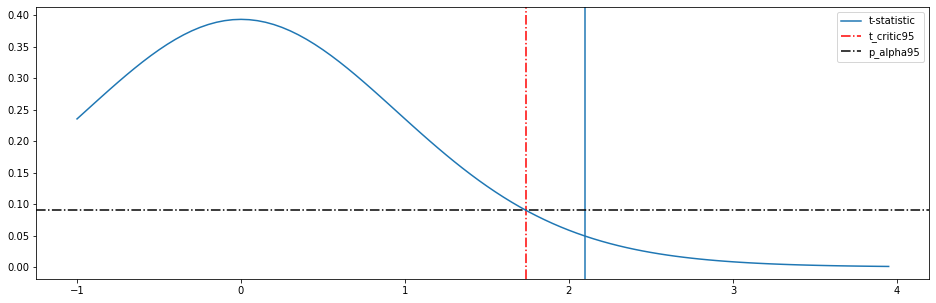

In [73]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

x= np.arange(-1,4,.05)
y = stats.t.pdf(x,loc=0,scale=1,df=df)

t_critic95=  stats.t.ppf(0.95, df =df)
p_alpha95 = stats.t.pdf(t_critic95, df =df)

plt.figure(figsize=(16,5))
plt.axvline(x=t,label = 't-statistic')
plt.axvline(x=t_critic95,label = 't_critic95',color = 'r',linestyle='-.')
plt.axhline(y=p_alpha95,label = 'p_alpha95',color = 'black',linestyle='-.')

plt.plot(x,y)
plt.legend();

In [60]:
print(df)

17.673079085111


In this case, there is a 2.5% probability you would see a t-score equal to or greater than what you saw from the data. Given that alpha was set at 0.05, this would constitute sufficient evidence to reject the null hypothesis.

Building on this, you can also write a function that calculates the p-value for given samples with a two-sided test by taking advantage of the symmetry of the t-distribution to calculate only one side. The two-tailed p-value is simply twice the one-tailed value because you want the probability:  
> $t<−|t̂|$ and  $t>|t̂|$ , where t̂  is the t-statistic calculated from our data  

With that, define a summative function `p_val_welch(a, b, two_sided=False)` which takes in two samples a and b, as  well as an optional binary variable to allow you to toggle between a one and two-sided Welch's t-test.   

> The default behavior should be set to one-sided as indicated above. If the parameter two_sided is set to True, the function should return the p-value for a two-sided t-test, as opposed to a one-sided t-test.

In [78]:
def p_value(a, b, two_sided=False):
    # Your code here
    t = welch_t(control, treatment)
    df = welch_df(control, treatment)
    p_val = 1 - stats.t.cdf(t, loc=0,scale=1,df =df)
    if two_sided==False:
        return p_val
    else:
        return 2*p_val
    return # Return the p-value!

Now briefly test your function; no need to write any code just run the cells below to ensure your function is operating properly. The output should match the commented values.

In [79]:
p_value(treatment, control)
# 0.025191666225846454

0.025191666225846343

In [80]:
p_value(treatment, control, two_sided=True)
# 0.05038333245169291

0.050383332451692686

## Summary

Nice work! In this lab, you practiced implementing functions for Welch's t-test when sample variances or sample sizes differ in your experimental groups. You also got to review converting t-scores into p-values. All of this should continue to build on your abilities to effectively design and carry out statistically valid hypothesis tests.